# In class Assignment- 
Analyzing your `time sheet` using Pandas, Matplotlib and Seaborn modules.Save this file as InClassAssignment_Timesheet_xxxx where xxxx will be your initials
- Name: Kadin McWilliams
- Date: 2/15/23
- Version: 1.0

### Import Modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

### Load the dataset and save it to a dataframe named 'df'
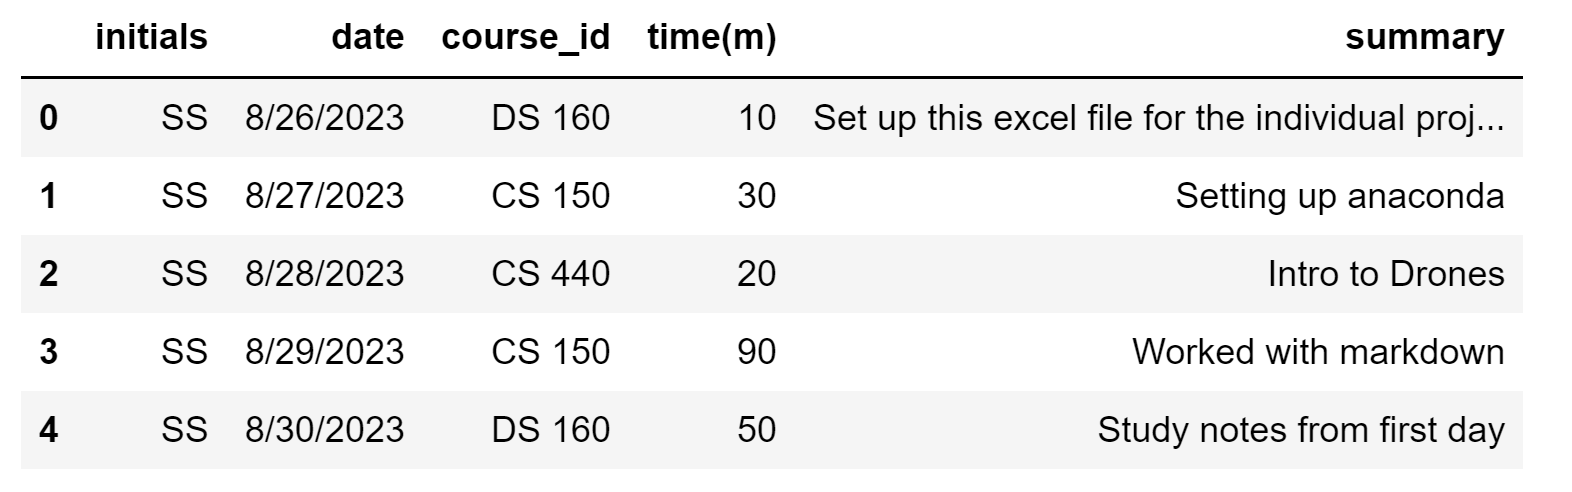

In [2]:
warnings.simplefilter(action='ignore',category=FutureWarning)
df=pd.read_csv('TimeSheet.csv')
df.sample(5)

,Initial,date,course_id,time(m),summary
40,KM,2/7/24,PSYC-313-01,210,Studying for test
4,KM,1/10/24,MATH-215-01,50,Learned about linear systems
21,KM,1/25/24,PSYC-313-01,75,Learned about histroy of cognition
26,KM,1/30/24,MATH-215-01,60,Homework
36,KM,2/6/24,PSYC-313-01,75,Learned about histroy of cognition


In [3]:
df.columns

Index(['Initial', 'date', 'course_id', 'time(m)', 'summary'], dtype='object')

### Investigate your dataset (head, tail, info)
- How many entries in your dataset?
- Is there any missing value?
- What are the data types?

In [4]:
df.head()

,Initial,date,course_id,time(m),summary
0,KM,1/8/24,MATH-215-01,50,Learned about linear systems
1,KM,1/9/24,DS-160-01,75,In class activities
2,KM,1/9/24,BUSA-245-02,75,Learned about information systems
3,KM,1/9/24,PSYC-313-01,75,Learned about histroy of cognition
4,KM,1/10/24,MATH-215-01,50,Learned about linear systems


In [5]:
df.tail()

,Initial,date,course_id,time(m),summary
43,KM,2/13/24,DS-160-01,75,In class activities
44,KM,2/13/24,BUSA-245-02,75,Learned about information systems
45,KM,2/15/24,PSYC-313-01,75,Learned about histroy of cognition
46,KM,2/15/24,DS-160-01,75,In class activities
47,KM,2/15/24,BUSA-245-02,75,Learned about information systems


In [6]:
df.info()
df['course_id'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Initial    48 non-null     object
 1   date       48 non-null     object
 2   course_id  48 non-null     object
 3   time(m)    48 non-null     int64 
 4   summary    48 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.0+ KB


MATH-215-01    13
BUSA-245-02    13
DS-160-01      11
PSYC-313-01    11
Name: course_id, dtype: int64

### Investigating data 
- There are 46 entries in my data set, 13 for BUSA, 12 for MATH, 11 for DS, and 10 for PSYC
- There are no missing values in my data set
- My data types are object and int

### Summary Statistics
Calculate basic statistics for the 'Time (minutes)' column, such as mean, median, minimum, and maximum. This will give you an overview of how time is distributed across activities. use table and graphical representations (sample below)
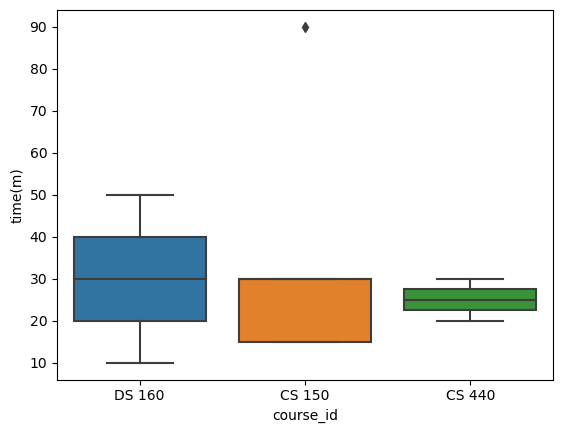

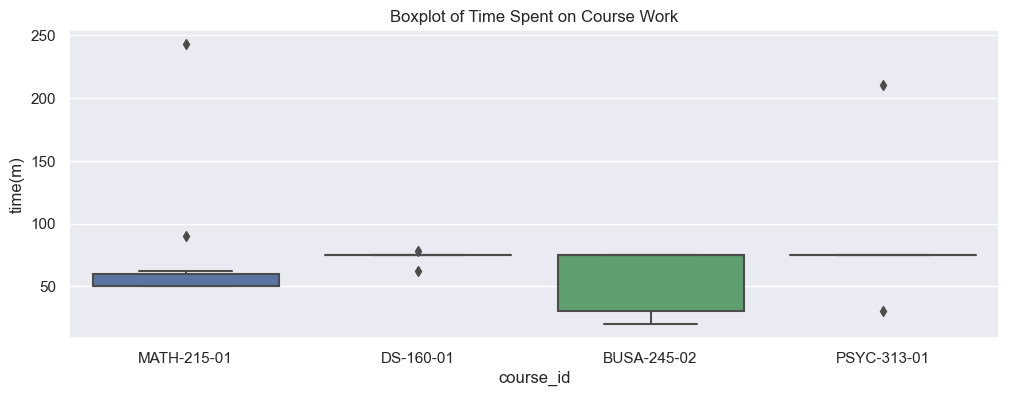

In [7]:
sns.set(rc={'figure.figsize':(12,4)})
sns.boxplot(y='time(m)', x='course_id', data=df)
plt.title("Boxplot of Time Spent on Course Work")
plt.show()

## Summary Statistics 
### Mean - 68.13 minutes
### Median - 75 minutes
### Mode - 46
### Minimum - 20 minutes 
### Maximum - 243 minutes


In [8]:
print(df.describe())

          time(m)
count   48.000000
mean    70.958333
std     37.065186
min     20.000000
25%     50.000000
50%     75.000000
75%     75.000000
max    243.000000


### Create two new columns "day" and "day_name" using the "Date" column in which the day will represent the range of days (sample below)
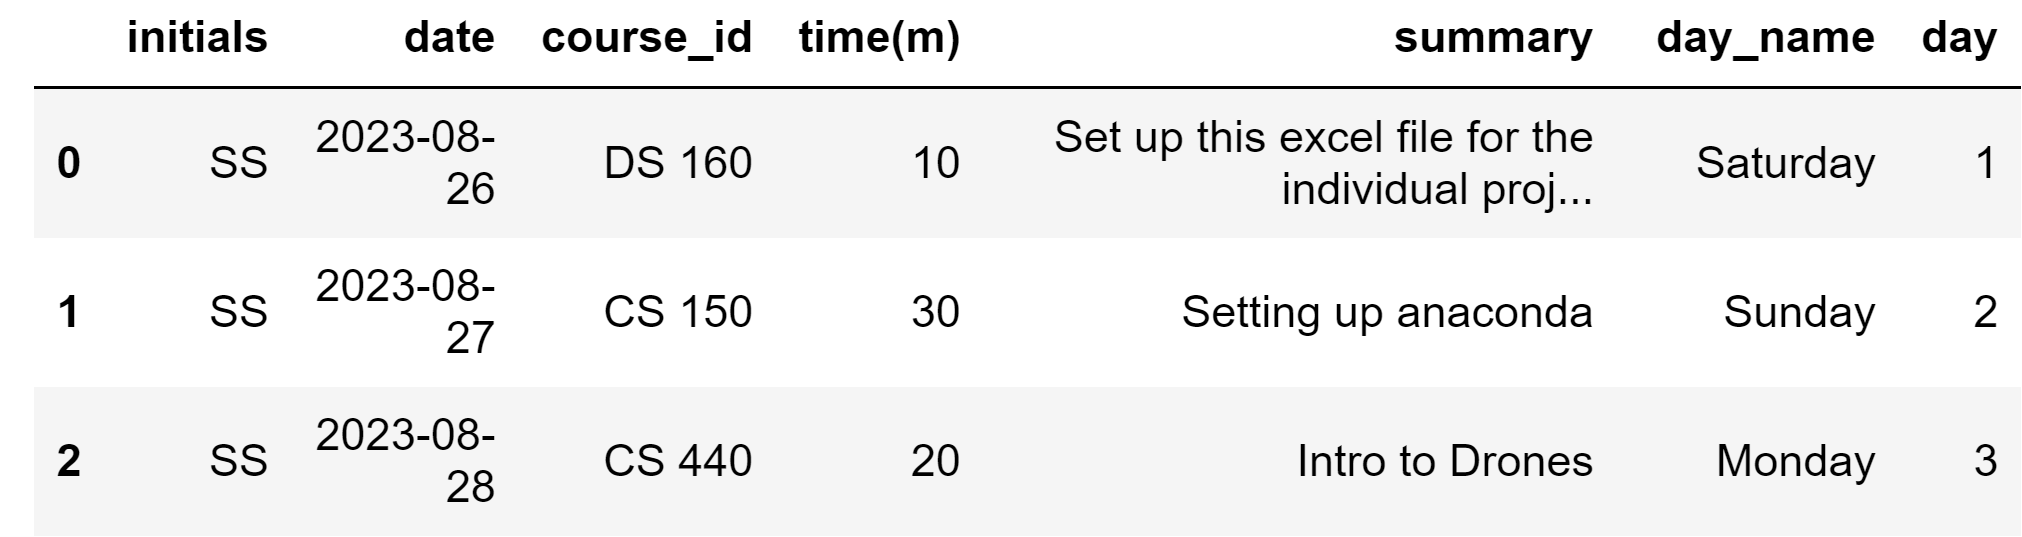
- df['day'] = range(1, len(df) + 1)

In [9]:
df['date']=pd.to_datetime(df['date'])

#df['day']=range(1, len(df) + 1)
#df.head()

In [27]:
df['day']=range(1, len(df) + 1)
df['day_name']=df['date'].dt.day_name()
df.head()

,Initial,date,course_id,time(m),summary,day,day_name
0,KM,2024-01-08,MATH-215-01,50,Learned about linear systems,1,Monday
1,KM,2024-01-09,DS-160-01,75,In class activities,2,Tuesday
2,KM,2024-01-09,BUSA-245-02,75,Learned about information systems,3,Tuesday
3,KM,2024-01-09,PSYC-313-01,75,Learned about histroy of cognition,4,Tuesday
4,KM,2024-01-10,MATH-215-01,50,Learned about linear systems,5,Wednesday


### Data Visualization:
1. Create a histogram to visually represent the distribution of time spent.
2. Create a  bar chart (sample below) to visually represent the distribution of time spent on different courses and comment on the course you spent most and least time
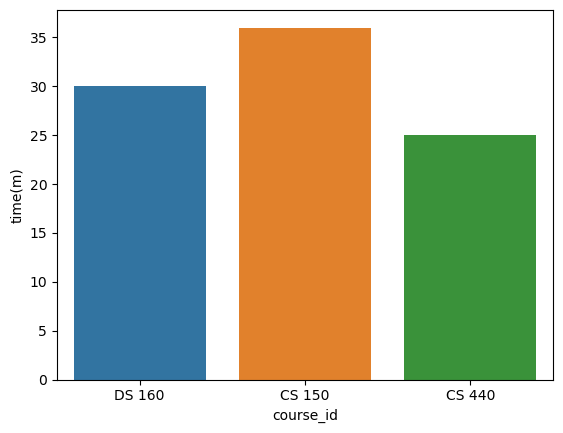

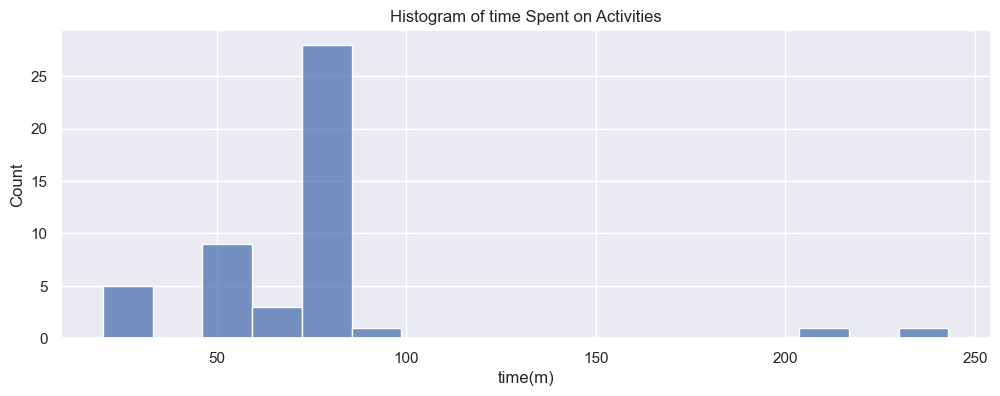

In [11]:
sns.histplot(x='time(m)',data=df)
plt.title("Histogram of time Spent on Activities")
plt.show()

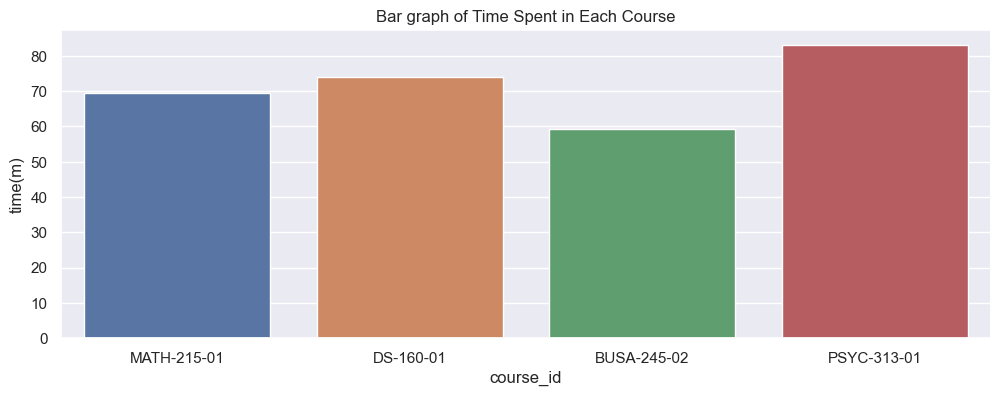

In [12]:
sns.barplot(y='time(m)',x='course_id', ci=None,data=df)
plt.title("Bar graph of Time Spent in Each Course")
plt.show()

### Activity Counts:

Count the occurrences of each course in the dataset to see `how often` you engaged in each.

In [13]:
df['course_id'].value_counts()

MATH-215-01    13
BUSA-245-02    13
DS-160-01      11
PSYC-313-01    11
Name: course_id, dtype: int64

### Course Engagement 
- BUSA-245, 13
- MATH-215, 12
- DS-160, 11
- PSYC-3133, 10

### Time Trends:

Plot a line chart (sample below) to visualize how time spent on activities changes over the observed days.
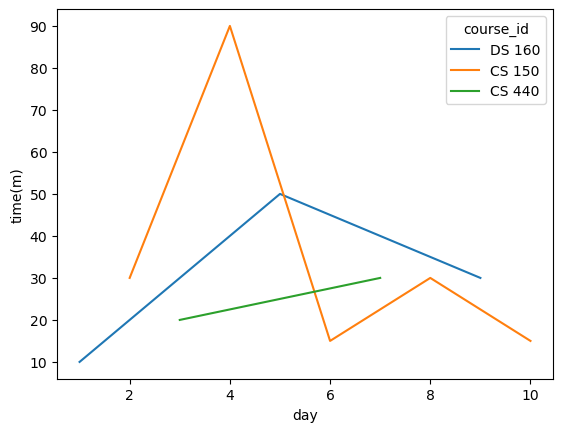

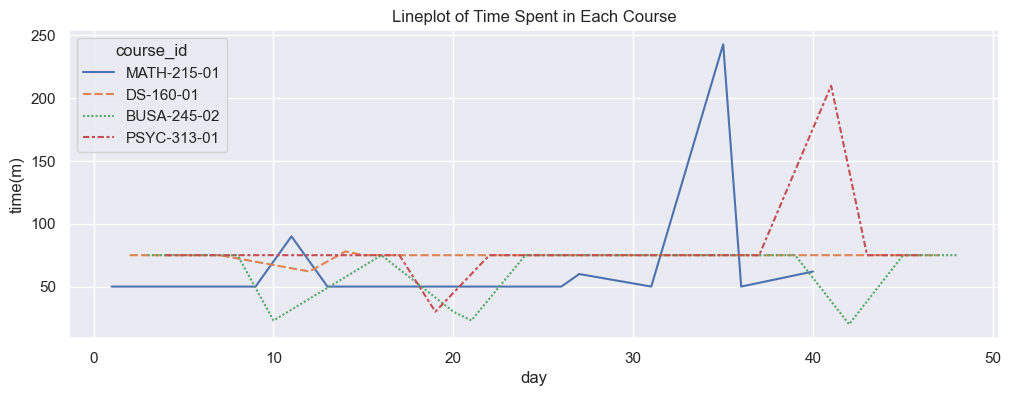

In [15]:
sns.lineplot(x='day',y='time(m)',hue='course_id',style='course_id',data=df)
plt.title("Lineplot of Time Spent in Each Course")
plt.show()

### Course Analysis:

For each course ex.(DS 160, CS 150, CS 440), calculate the total time spent. Which course received the most time, and which received the least?
- Sample print statement: Total time spent on CS160: 180 min

In [22]:
df.groupby(['course_id'])['time(m)'].sum()
print("Total time spent on each course are as follows\n\nBUSA 245: 771 min\nDS 160: 815 min\nMath 215: 905 min\nPsyc 313: 915 min\n\nPSYC 313 had the most time at 915 minutes and BUSA 245 had the least time at 771 minutes.")

Total time spent on each course are as follows

BUSA 245: 771 min
DS 160: 815 min
Math 215: 905 min
Psyc 313: 915 min

PSYC 313 had the most time at 915 minutes and BUSA 245 had the least time at 771 minutes.


### Correlations:
- Examine whether there are any correlations between the day and the time spent. For example, do you spend more time on courses over days or less (sample below).
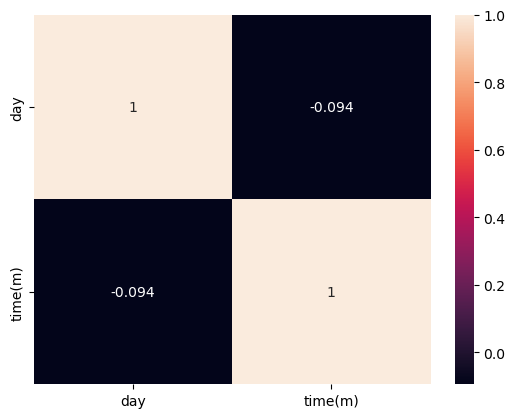

             day  time(m)
day      1.00000  0.22621
time(m)  0.22621  1.00000


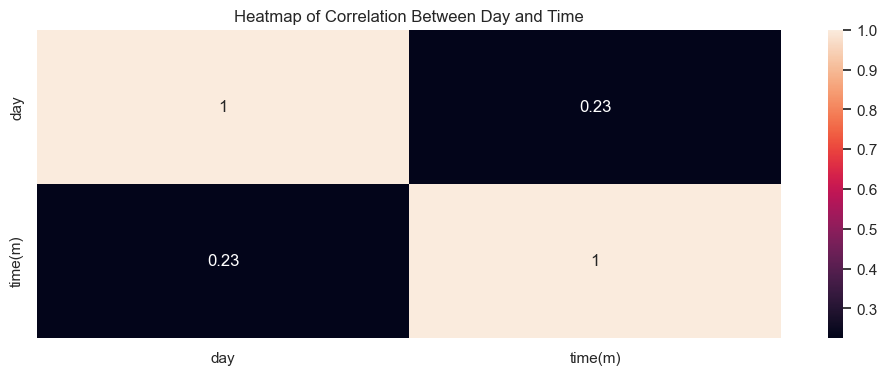

In [32]:
corr=df[['day','time(m)']].corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.title("Heatmap of Correlation Between Day and Time")
plt.show()

### Your Reflection on the findings

### In conclusion I was suprised by the data that I found, I thought that Psycology would have the lowest amount of time spent and Math would be the highest amount of time. I also didn't think that BUSA would be my lowest amount of time. I noticed that BUSA had the highest engagement which was probably what was changing my perception. I think that the quantity of time I spend on a class does not affect how much effort I am putting into the class but a higher number of engagement makes me feel like I am spending more time. 

### Submit the work by Friday 16th end of the day